### 必要模組

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 用CIFAR10這個資料作為資料A

In [2]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

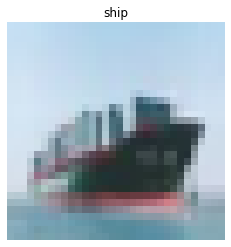

In [4]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

### 建立Cifar10的神經網路架構

In [5]:
#修改神經元數
CNN_layers = [Conv2D(20, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(40, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(100, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
FC_layers = [Dense(units=50, activation='relu'),
             Dense(units=10, activation='softmax')]

In [6]:
#建立模型
model_2 = Sequential(CNN_layers+FC_layers)

In [7]:
#檢視
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 40)        7240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 100)         36100     
_________________________________________________________________
global_average_pooling2d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5

In [9]:
#這裡最佳化方式我改用SGD lr=0.1
model_2.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.1),
              metrics=['categorical_accuracy'])

In [11]:
#訓練
model_2.fit(X_train, y_train, 
          batch_size=250, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 78s 2ms/sample - loss: 2.2503 - categorical_accuracy: 0.1627 - val_loss: 2.1044 - val_categorical_accuracy: 0.2092
Epoch 2/3
50000/50000 [==============================] - 79s 2ms/sample - loss: 2.1135 - categorical_accuracy: 0.2100 - val_loss: 2.0278 - val_categorical_accuracy: 0.2406
Epoch 3/3
50000/50000 [==============================] - 80s 2ms/sample - loss: 2.0233 - categorical_accuracy: 0.2534 - val_loss: 1.9407 - val_categorical_accuracy: 0.2863


### 儲存並查看準確率

In [12]:
model_2.save_weights('LeNet5_CIFAR10.h5')

In [14]:
model_2.load_weights('LeNet5_CIFAR10.h5')

score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 5s 515us/sample - loss: 1.9407 - categorical_accuracy: 0.2863
Train Accuracy: 27.588000893592834
Test Accuracy: 28.630000352859497


### 使用CIFAR100作為資料集B

In [15]:
# Load CIFAR 100
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

### 建立CIFAR100的神經網路架構(跟資料集A借用CNN層)

In [16]:
#創建CIFAR100的FC層
FC_layers_CF100 = [Dense(units=33, activation='relu'),
                   Dense(units=66, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [17]:
#使用CIFAR10的CNN層跟CIFAR100的FC層合併
model_CF100 = Sequential(CNN_layers+FC_layers_CF100)

In [18]:
#檢視
model_CF100.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 40)        7240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 100)         36100     
_________________________________________________________________
global_average_pooling2d (Gl (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 33)               

### 轉移學習

In [19]:
#用Frozen 凍結CIFAR10的CNN，不重新訓練
for layer in CNN_layers:
    layer.trainable = False

In [20]:
model_CF100.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 40)        7240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 100)         36100     
_________________________________________________________________
global_average_pooling2d (Gl (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 33)               

In [21]:
model_CF100.compile(loss='categorical_crossentropy', 
                    optimizer=SGD(lr=0.1),
                    metrics=['categorical_accuracy'])

In [22]:
#一樣使用跟資料A一樣批次及次數
model_CF100.fit(U_train, v_train,
                batch_size=250, 
                epochs=3,
                validation_data=(U_test, v_test)
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 57s 1ms/sample - loss: 4.5810 - categorical_accuracy: 0.0145 - val_loss: 4.5297 - val_categorical_accuracy: 0.0191
Epoch 2/3
50000/50000 [==============================] - 55s 1ms/sample - loss: 4.4568 - categorical_accuracy: 0.0232 - val_loss: 4.4038 - val_categorical_accuracy: 0.0217
Epoch 3/3
50000/50000 [==============================] - 55s 1ms/sample - loss: 4.3654 - categorical_accuracy: 0.0294 - val_loss: 4.3404 - val_categorical_accuracy: 0.0329


### 結果

In [23]:
score_train = model_CF100.evaluate(U_train, v_train)
score_test = model_CF100.evaluate(U_test, v_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 11s 1ms/sample - loss: 4.3404 - categorical_accuracy: 0.0329
Train Accuracy: 3.4619998186826706
Test Accuracy: 3.2900001853704453
